# 이산 시간 랜덤 워크

비정상 확률 과정의 대표적인 예가 랜덤 워크(random walk)이다. 여기에서는 시간 인덱스가 연속적이지 않은 이산 시간(discrete-time) 랜덤 워크를 소개한다.

이산 시간 랜덤 워크는 백색 잡음(white noise)을 누적한 값으로 이루어진 확률 과정을 말한다.

수식으로 정의하면 다음과 같다.

$$ 
\begin{eqnarray}
W_1 &=& e_1 \\
W_2 &=& e_1 + e_2 \\
\vdots &=& \vdots \\
W_t &=& e_1 + e_2 + \cdots + e_t \\
\end{eqnarray}
$$

또는

$$ W_t = W_{t-1} + e_t $$


이산 시간 랜덤 워크는 다음과 같은 특성을 가진다.

* 기댓값은 0 ( 시간이 지나서 기대값을 보면 기대값은 0이고, 샘플이 많으면 많을수록 기대값은 0으로 수렴) 

$$ \text{E}[W_t] = 0 $$

$$ \text{E}[W_t] = \text{E} \left[ \sum_{i=1}^t e_t \right] = \sum_{i=1}^t \text{E} \left[ e_t \right] = 0 $$
* 분산은 시간에 비례 (분산은 시간이 지남에 따라 커진다) 

$$ \text{Var}[W_t] = t\sigma_e^2 $$

$$ \text{Var}[W_t] = \text{E} \left[ \sum_{i=1}^t e_t^2 \right]  =  t\sigma_e^2 $$ 

* 자기공분산은 두 시간 중 빠른 시간에 비례 

$$ \gamma_{t,s} =  \gamma_{s, t} = t\sigma_e^2  \; \text{ if } t < s $$

$$ \gamma_{t,s} = \text{Cov}[W_t, W_s] = \text{E} \left[ \sum_{i=1}^t e_t \sum_{i=1}^s e_s \right]  = \text{E} \left[ \sum_{i=1}^t e_t^2 \right]  =  t\sigma_e^2 $$ 


* 자기상관계수는 두 시간의 비율의 제곱근에 비례 

$$ \rho_{t,s} = \rho_{s,t} = \sqrt{\dfrac{t}{s}}  \; \text{ if } t < s $$

$$ \rho_{t,s} = \dfrac{\text{Cov}[W_t, W_s]}{\sqrt{\text{Var}[W_t]\text{Var}[W_s]}} 
= \dfrac{t\sigma_e^2}{\sqrt{t\sigma_e^2 s\sigma_e^2}} = \sqrt{\dfrac{t}{s}}  $$ 


이산 시간 랜덤 워크는 백색 잡음에 대한 누적합(cumsum)으로 구현할 수 있다.

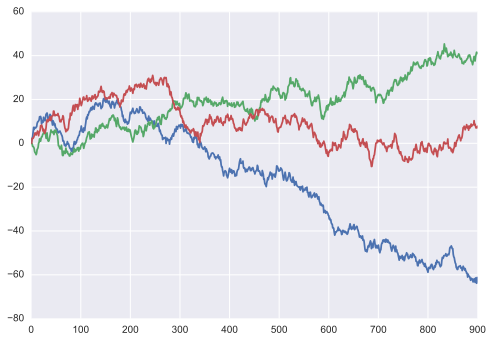

In [55]:
for i in range(3):
    np.random.seed(9*i)
    e = sp.stats.norm.rvs(size=900)
    W = np.insert(np.cumsum(e), 0, 0)
    plt.plot(W);